In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt


In [3]:
path = r"C:\BTEC_FPT\IT0602-Business Process Support\ASM\DataASMBPS"
filepaths = []
import csv

# Collect file paths
for file in os.listdir(path):
    filepath = os.path.join(path, file)
    if file.endswith(".csv"):
        filepaths.append(filepath)

# Read CSV files
dataframes = []  # List to store the dataframes
for filepath in filepaths:
    df = pd.read_csv(filepath)
    dataframes.append(df)

# Process the dataframes
for i, df in enumerate(dataframes):
    print(f"Dataframe {i+1}:")
    print(df.head())
    print("-------------------")

with open(filepath, 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        print(row)

Dataframe 1:
  CustomerID FirstName  LastName  Gender                        Email  \
0     CUSID1     Adair   Sheasby    Male        asheasby0@pcworld.com   
1     CUSID2     Hinze  Swinyard    Male          hswinyard1@webs.com   
2     CUSID3      Lacy   Gabbett  Female        lgabbett2@4shared.com   
3     CUSID4    Blisse      Head  Female              bhead3@admin.ch   
4     CUSID5   Coretta     Lorne  Female  clorne4@merriam-webster.com   

          Phone              Address  
0  741-468-2202    6447 Cascade Hill  
1  452-122-9284   95 Cambridge Plaza  
2  854-463-9825      11 Nobel Avenue  
3  943-497-3676  37552 Stephen Plaza  
4  465-701-1421        79 Schurz Way  
-------------------
Dataframe 2:
  ProductID               ProductName    Category       Price
0      PID1        Samsung Galaxy S21  Smartphone    $934.98 
1      PID2         iPhone 12 Pro Max  Smartphone    $372.13 
2      PID3  Samsung Galaxy S21 Ultra  Smartphone  $1,856.98 
3      PID4            Google Pix

In [5]:
# Read the CSV file into the dataframe
dataframe = pd.read_csv('Customer.csv')

df = pd.DataFrame(dataframe)

# Tính tổng số khách hàng theo giới tính
customer_count = df['Gender'].value_counts()

print(customer_count)

Gender
Male           457
Female         437
Genderfluid     21
Non-binary      21
Bigender        21
Polygender      15
Genderqueer     15
Agender         12
Name: count, dtype: int64


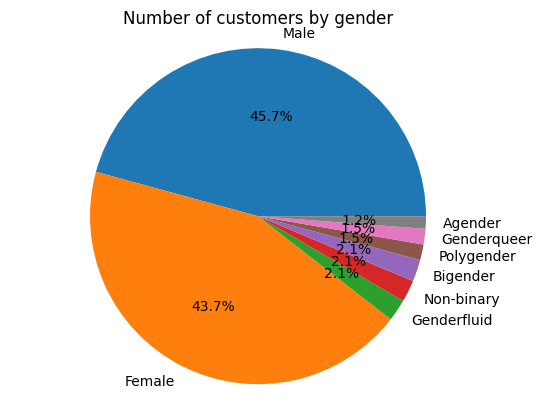

In [7]:
# Read the CSV file into the dataframe
dataframe = pd.read_csv('Customer.csv')

df = pd.DataFrame(dataframe)

# Tính tổng số khách hàng theo giới tính
customer_count = df['Gender'].value_counts()

# Tạo biểu đồ tròn
plt.pie(customer_count, labels=customer_count.index, autopct='%1.1f%%')
plt.axis('equal')  
plt.title('Number of customers by gender')

# Hiển thị biểu đồ tròn
plt.show()

In [12]:
# Read the CSV file into the dataframe
dataframe = pd.read_csv('SaleHistory.csv')

df = pd.DataFrame(dataframe)

df['Revenue'] = df['Revenue'].str.replace('$', '').astype(float)

# Calculate total revenue
total_revenue = df['Revenue'].sum()
print('Sale total:', total_revenue)
# transaction_count
transaction_count = len(df)
print('Transaction quantity:', transaction_count)

# Calculate the total sales quantity of each product
product_sales = df.groupby('ProductID')['Quantity'].sum()
# Identify best-selling products
best_selling_product = product_sales.idxmax()
best_selling_product_sales = product_sales.max()
print('Best - selling product:', best_selling_product)
print('Sell ​​number:', best_selling_product_sales)

# Calculate the total purchase quantity of each customer
customer_purchases = df.groupby('CustomerID')['Quantity'].sum()
# Identify customers who buy the most
top_customer = customer_purchases.idxmax()
top_customer_purchases = customer_purchases.max()
print('Customers who buy the most:', top_customer,'  ' 'Quantity purchased:', top_customer_purchases)

# Convert column "SaleDate" to date type
df['SaleDate'] = pd.to_datetime(df['SaleDate'], format='%m/%d/%Y')
# Group the data by date and calculate total revenue for each day
daily_revenue = df.groupby('SaleDate')['Revenue'].sum()
print('Distribution of revenue by day:')
print(daily_revenue)


Sale total: 453511.33
Transaction quantity: 3498
Sản phẩm bán chạy nhất: PID428
Số lượng bán: 22.0
Khách hàng mua nhiều nhất: CUSID100   Số lượng mua: 5.0
Phân bố doanh thu theo ngày:
SaleDate
2023-02-20    1096.58
2023-02-21     855.60
2023-02-22     465.33
2023-02-25    1474.63
2023-02-26     713.91
               ...   
2024-02-15     343.51
2024-02-16     773.09
2024-02-17     741.44
2024-02-18    1378.13
2024-02-19    1006.47
Name: Revenue, Length: 348, dtype: float64


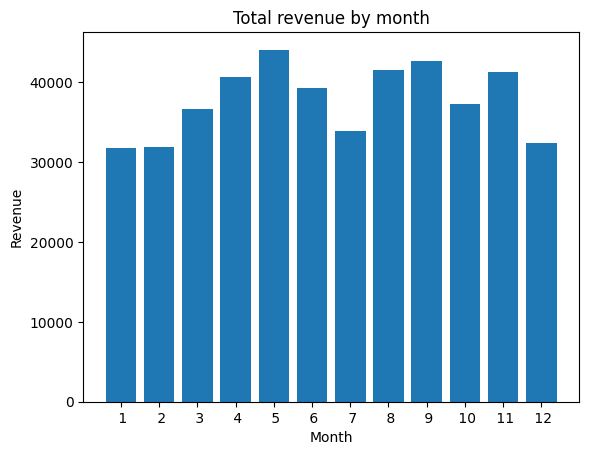

In [14]:
# Convert column "SaleDate" to date type
df['SaleDate'] = pd.to_datetime(df['SaleDate'], format='%m/%d/%Y')

# Create a new column "Month" to store information about the month
df['Month'] = df['SaleDate'].dt.month

# Group the data by month and calculate total revenue for each month
monthly_revenue = df.groupby('Month')['Revenue'].sum()

# Create a list of month names corresponding to month numbers
month_names = [' ' + str(i) for i in range(1, 13)]

# Draw a column chart showing total revenue by month
plt.bar(month_names, monthly_revenue)
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Total revenue by month')
plt.show()

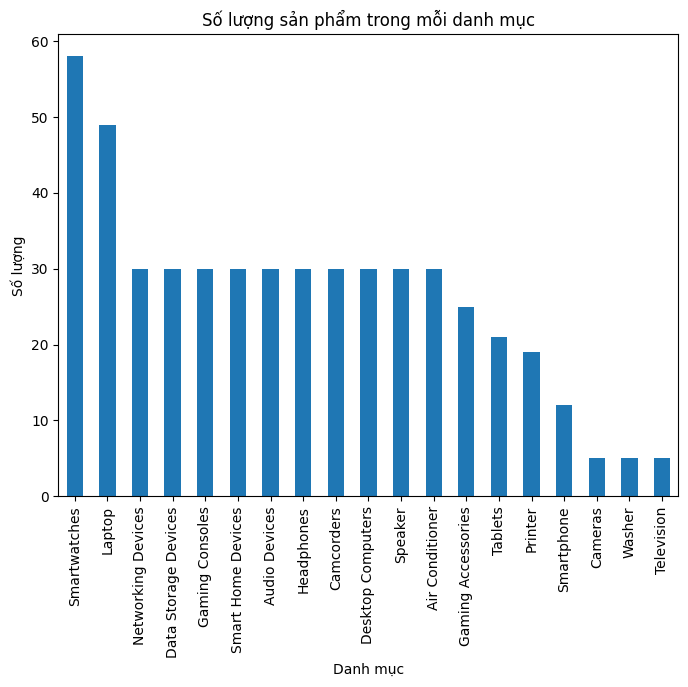


Thống kê giá trị sản phẩm:
count      499.000000
mean      1611.893347
std       1028.296248
min         20.150000
25%        775.570000
50%       1588.820000
75%       2299.465000
max      10000.830000
Name: Price, dtype: float64

Số lượng sản phẩm theo tên:
ProductName
Sennheiser HD 660 S                               2
Samsung Galaxy S21                                1
Razer Kraken Tournament Edition Gaming Headset    1
LaCie Rugged USB-C External Hard Drive            1
SanDisk Extreme Portable SSD                      1
                                                 ..
Asus ProArt PA90                                  1
Apple Mac Pro                                     1
Lenovo Yoga AIO                                   1
Dell Inspiron Desktop                             1
Xiaomi Mi Band 5                                  1
Name: count, Length: 498, dtype: int64


In [21]:
# Read the CSV file into the dataframe
dataframe = pd.read_csv('SaleHistory.csv')
# Tạo dataframe từ dữ liệu sản phẩm
df_products = pd.DataFrame(dataframe)
# Hiển thị dataframe
# print("Dataframe sản phẩm:")
# print(df_products)
# Phân loại sản phẩm theo danh mục
category_counts = df_products['Category'].value_counts()
# print("\nSố lượng sản phẩm trong mỗi danh mục:")
# print(category_counts)
plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Quantity')
plt.title('Number of products in each category')
plt.show()
# Chuyển đổi cột "Price" sang kiểu dữ liệu số
df_products['Price'] = df_products['Price'].str.replace('$', '').str.replace(',', '').astype(float)
# Thống kê giá trị sản phẩm
price_stats = df_products['Price'].describe()
print("\nThống kê giá trị sản phẩm:")
print(price_stats)
# Khám phá sản phẩm phổ biến
popular_products = df_products['ProductName'].value_counts()
print("\nSố lượng sản phẩm theo tên:")
print(popular_products)

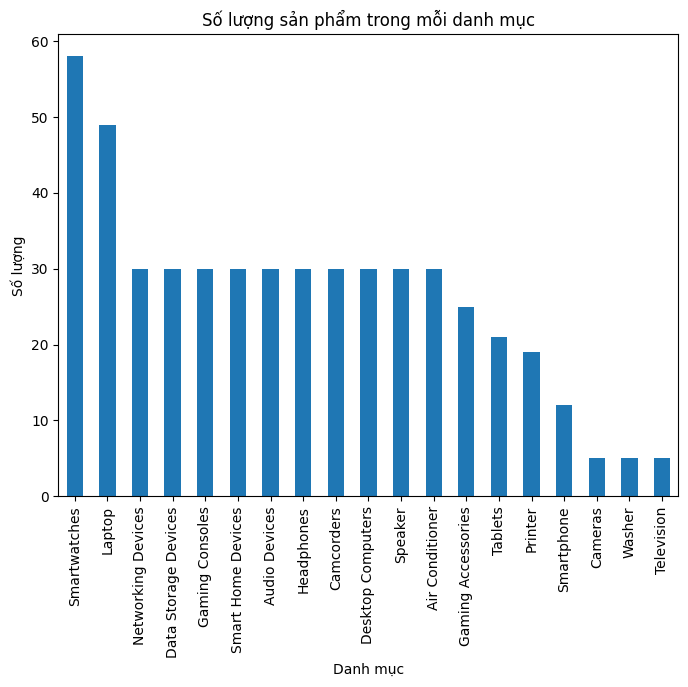

In [18]:
# Biểu đồ cột hiển thị sự phân bố của các danh mục sản phẩm
plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar')
plt.xlabel('Danh mục')
plt.ylabel('Số lượng')
plt.title('Số lượng sản phẩm trong mỗi danh mục')
plt.show()

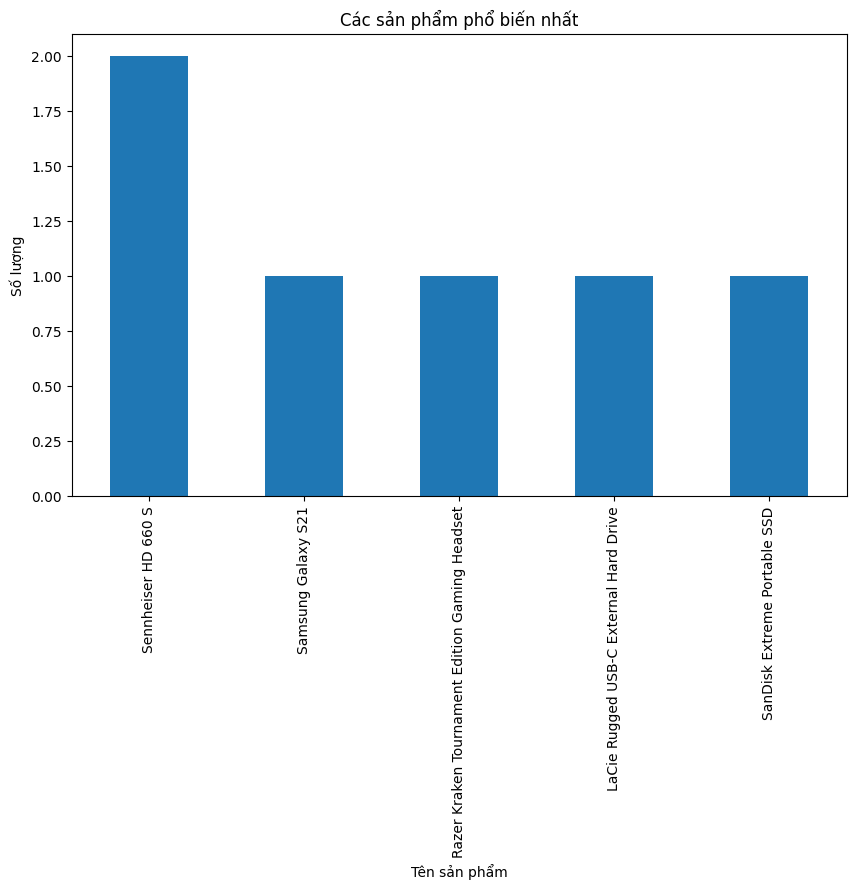

In [77]:
# Biểu đồ cột hiển thị các sản phẩm phổ biến nhất
plt.figure(figsize=(10, 6))
popular_products[:5].plot(kind='bar')
plt.xlabel('Tên sản phẩm')
plt.ylabel('Số lượng')
plt.title('Các sản phẩm phổ biến nhất')
plt.show()